# DS4400 Final Project 
# - Flight Customer Review Recommendation Precition
## (Tree-based prediction model and KNN)

## Group Member: Wenting Yue, Xiaofei Xie, Yuxi Shen

## Load Dataset

In [1]:
import pandas as pd
df_flight = pd.read_csv("capstone_airline_reviews3.csv", encoding="utf-8", encoding_errors='ignore').dropna()

### Add one sentiment score column into dataframe for analysis

In [2]:
from textblob import TextBlob

# define a function to classify reviews as positive or negative
def get_sentiment(review):
    blob = TextBlob(review)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

# apply the get_sentiment function to the review features column
df_flight['sentiment'] = df_flight['customer_review'].apply(get_sentiment)

In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# initialize the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# apply the sentiment analyzer to the review features column
df_flight['sentiment'] = df_flight['customer_review'].apply(lambda x: sia.polarity_scores(x)['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wentingyue/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Visualization

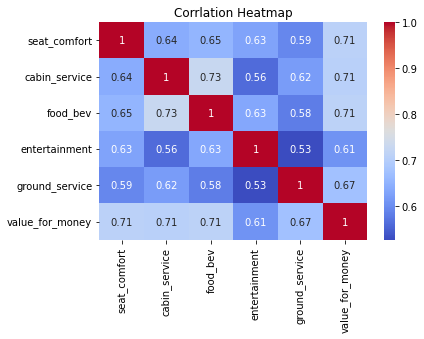

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load the data into a pandas DataFrame

# Select the columns of interest
cols = ['seat_comfort','cabin_service','food_bev','entertainment','ground_service','value_for_money']
data = df_flight[cols]

# Create the heatmap using the seaborn library
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

# Display the plot
plt.title('Corrlation Heatmap')
plt.show()

This correlation heatmap presents the correlations between six features in the flight dataset, including seat comfort score, cabin service score, food or beverage score, entertainment score, ground service score, and evaluation score of the value of money. From the heatmap, we could observe that there is a stronger positive correlation(0.73) between food & beverage quality and cabin service quality. Generally, customers would link their evaluation of if flight service is worth the ticket price based on the comforts of seats, quality of cabin service, and satisfaction with food and beverage.

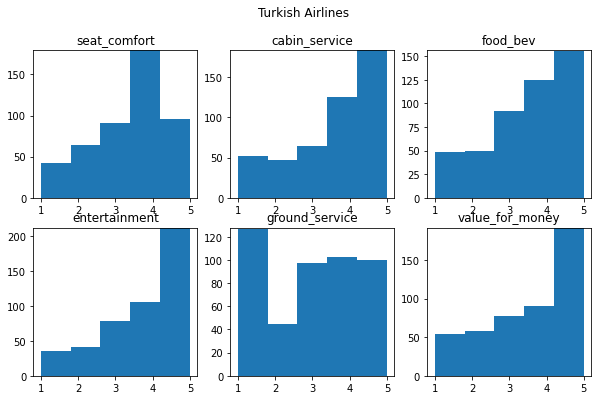

5


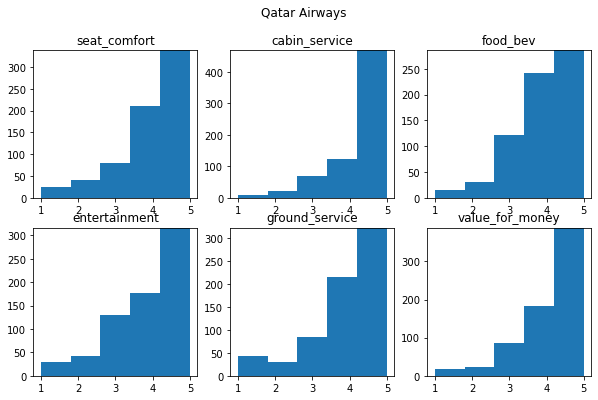

5


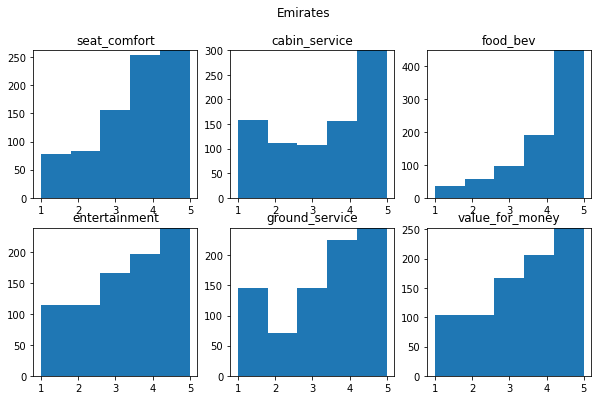

5


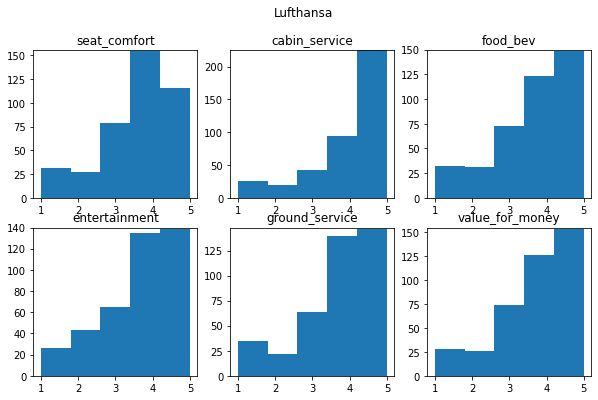

5


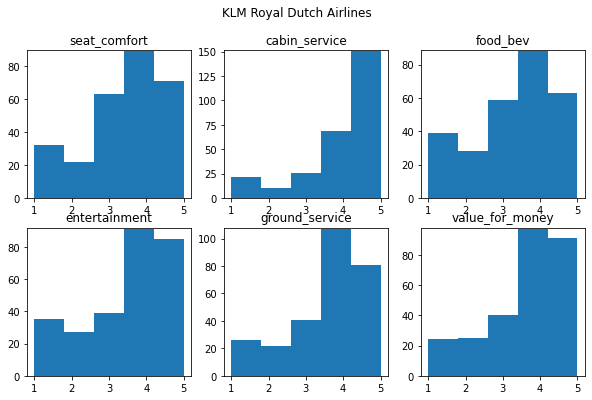

5


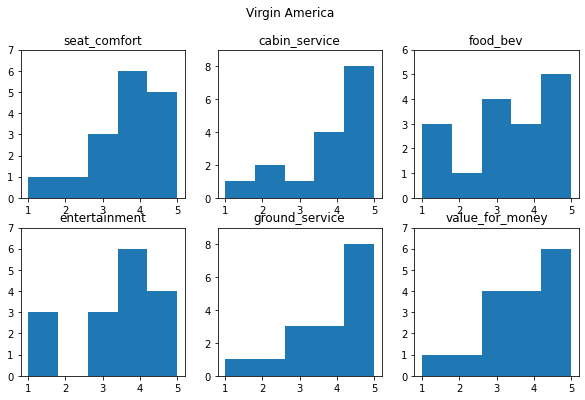

5


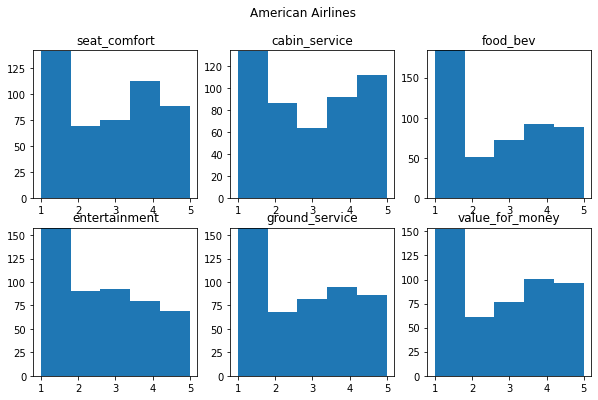

5


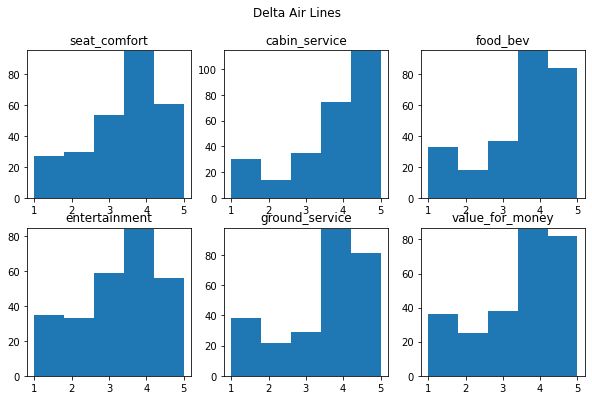

5


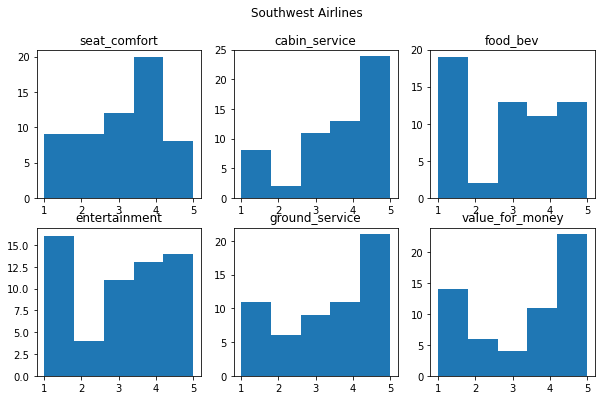

5


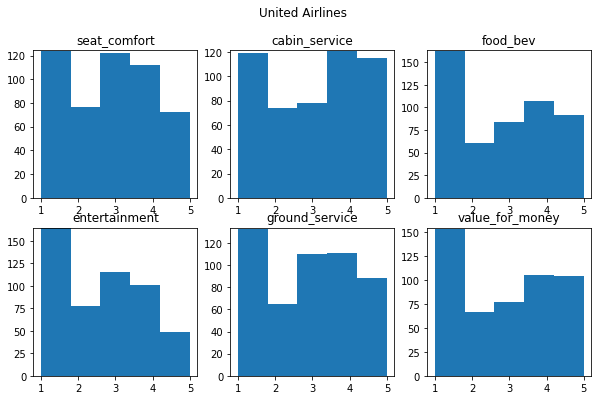

5


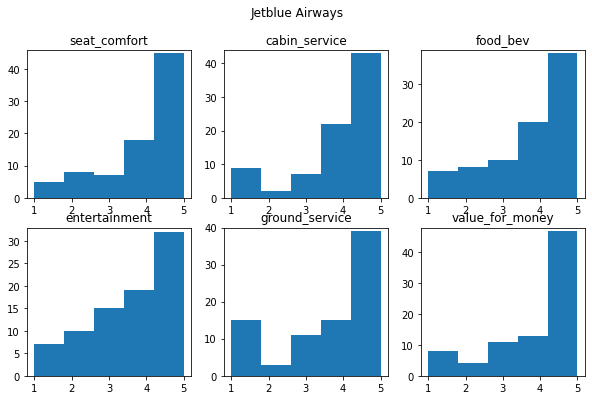

5


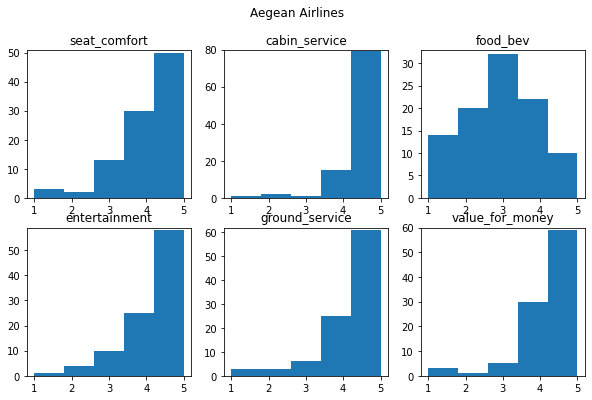

5


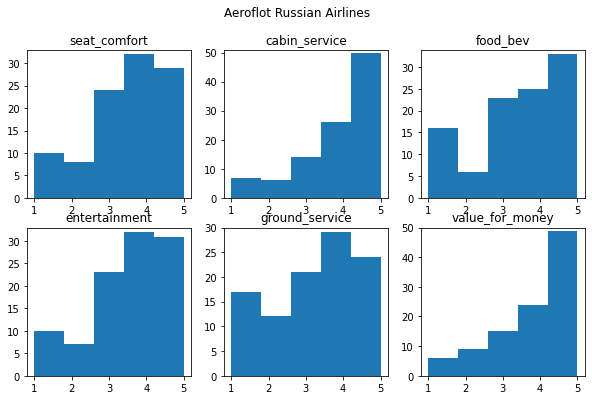

5


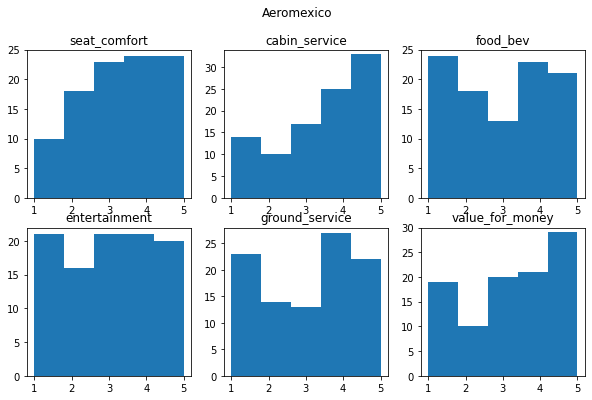

5


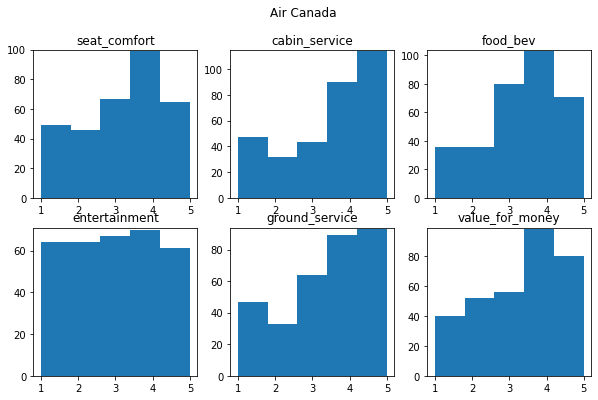

5


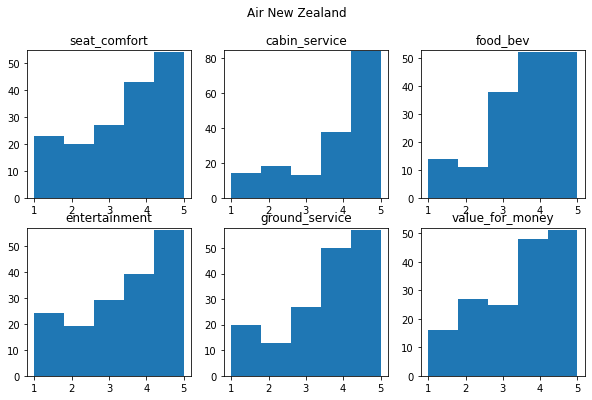

5


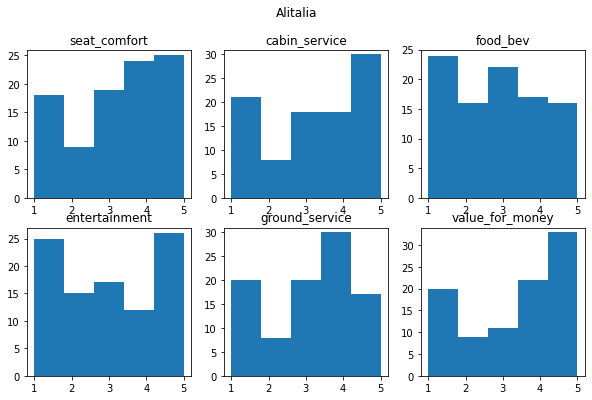

5


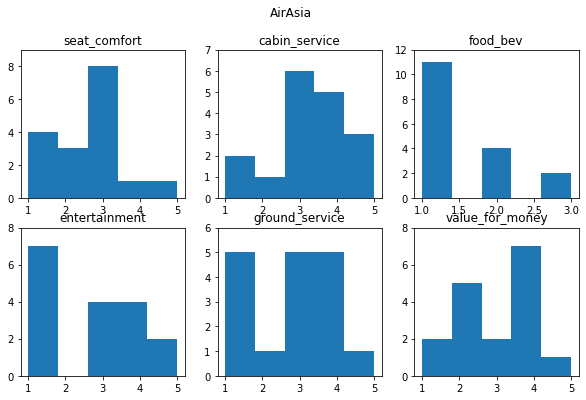

5


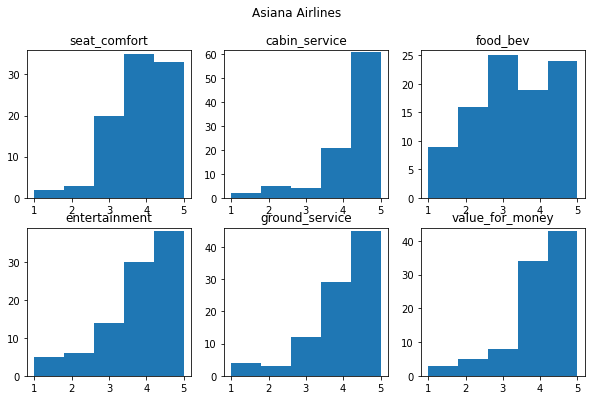

5


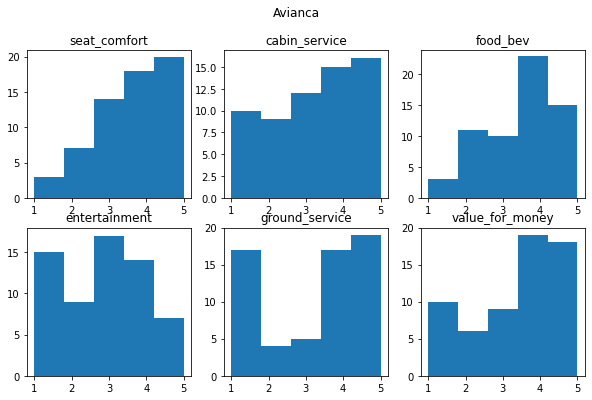

5


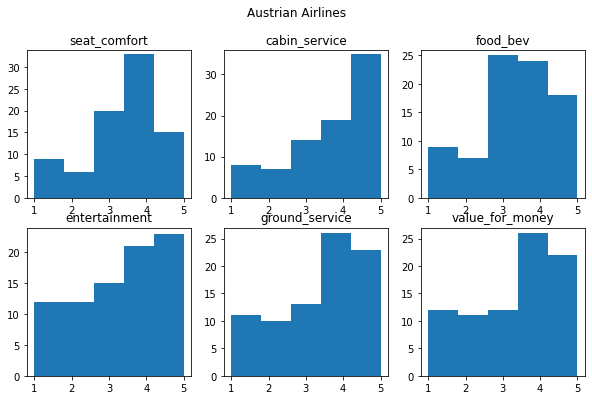

5


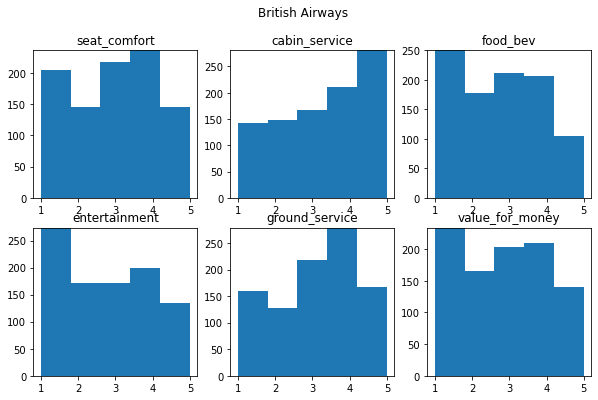

5


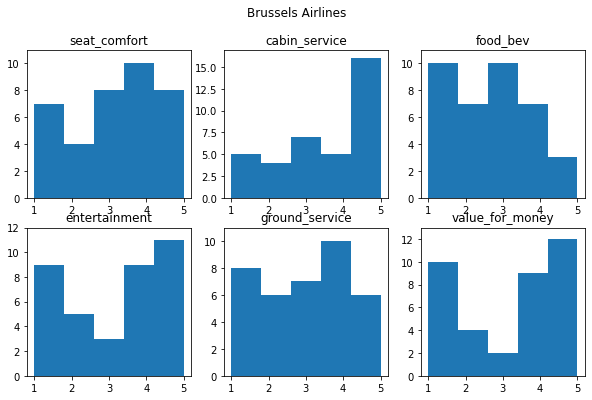

5


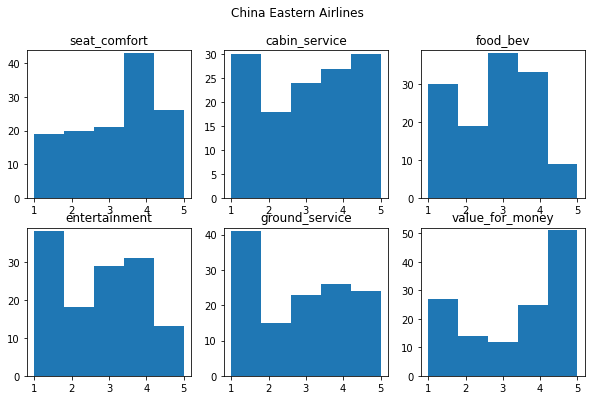

5


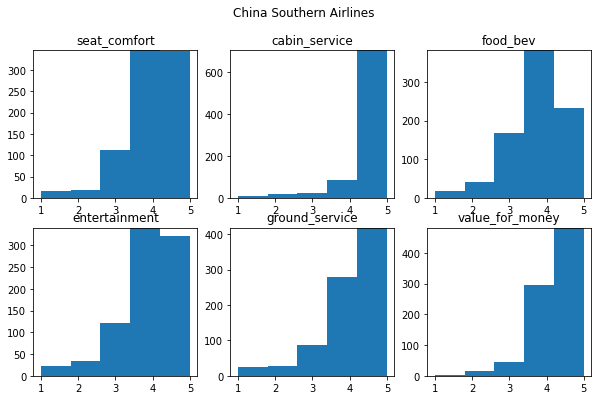

5


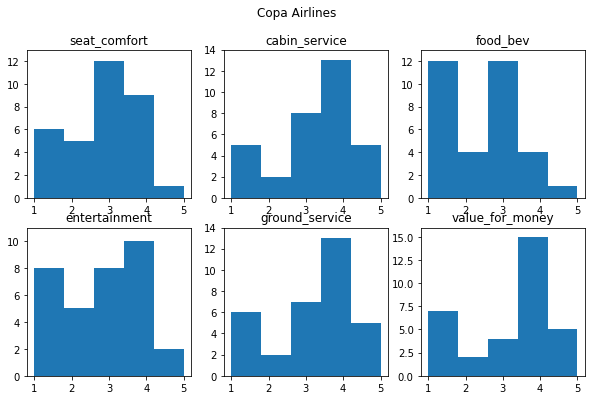

5


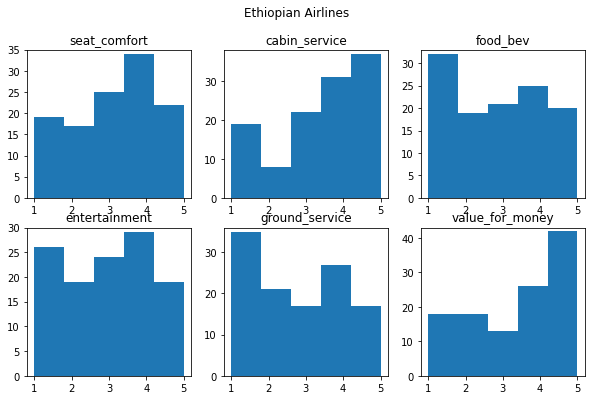

5


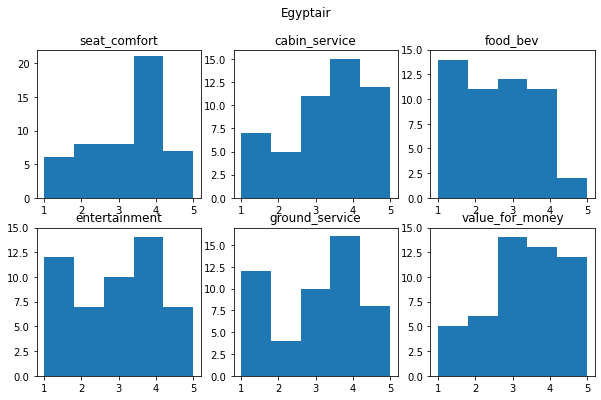

5


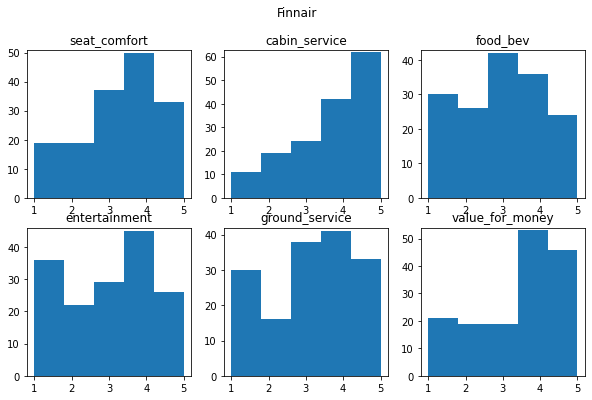

5


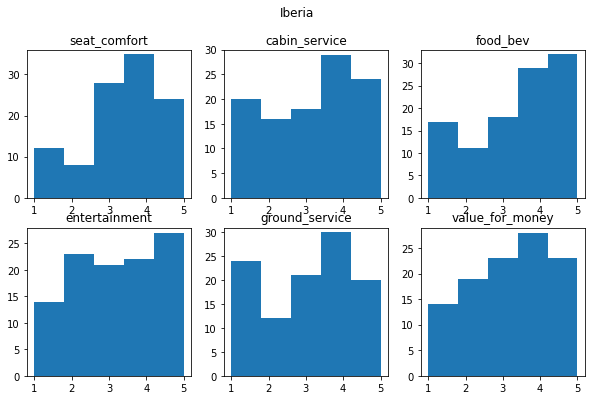

5


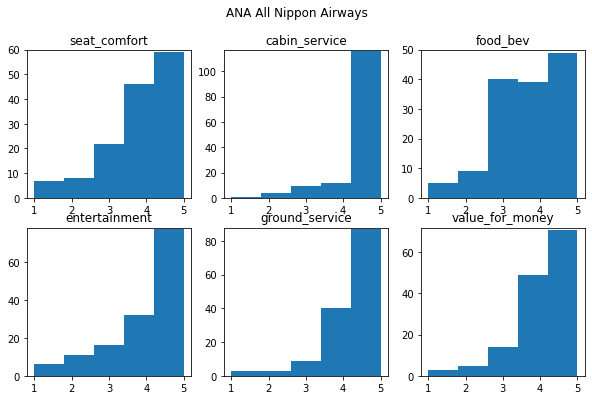

5


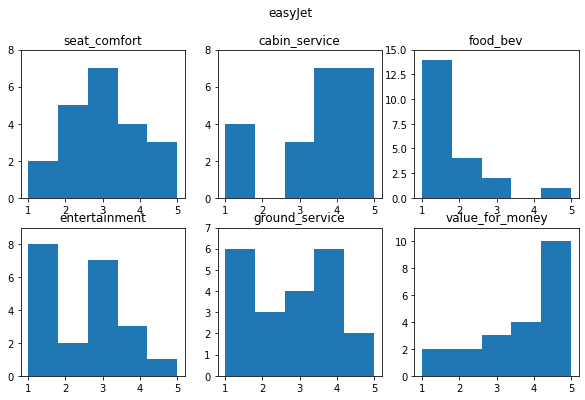

5


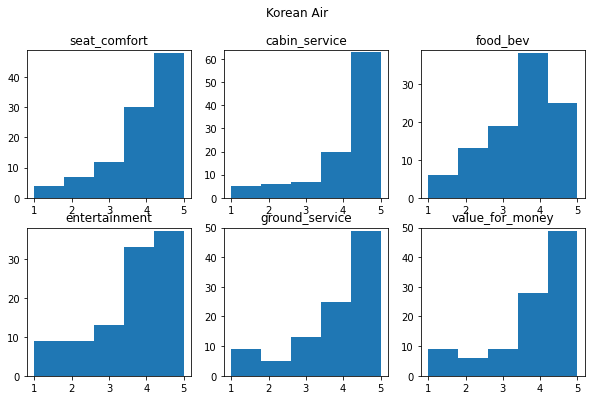

5


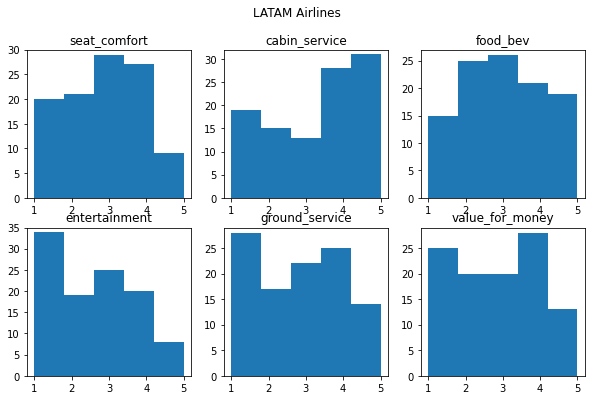

5


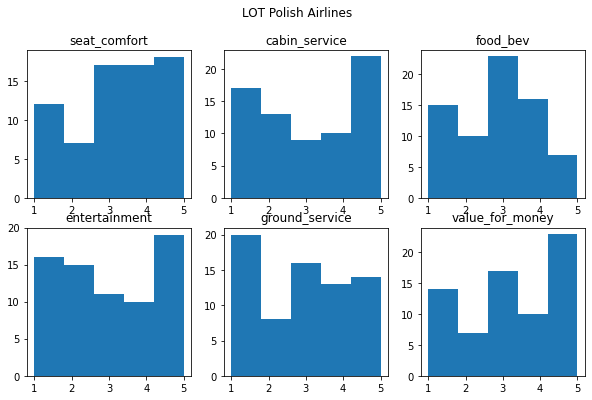

5


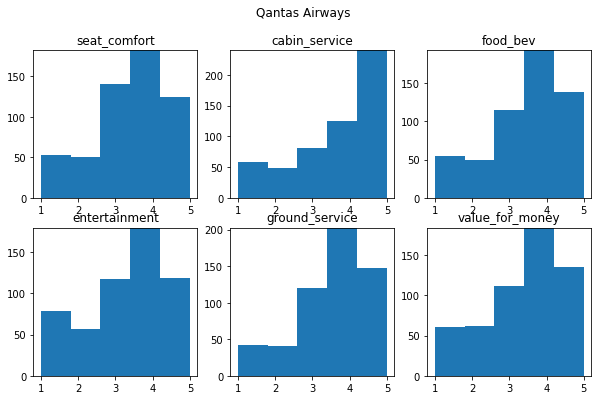

5


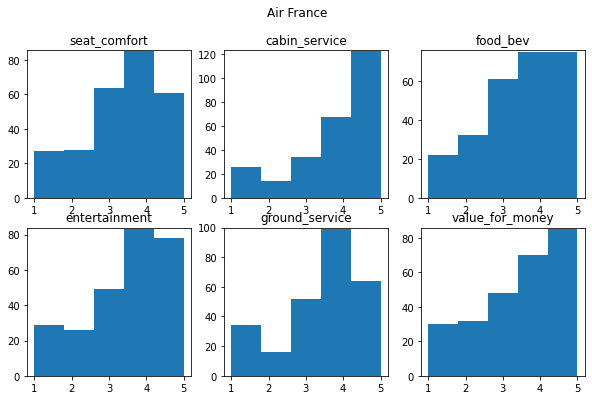

5


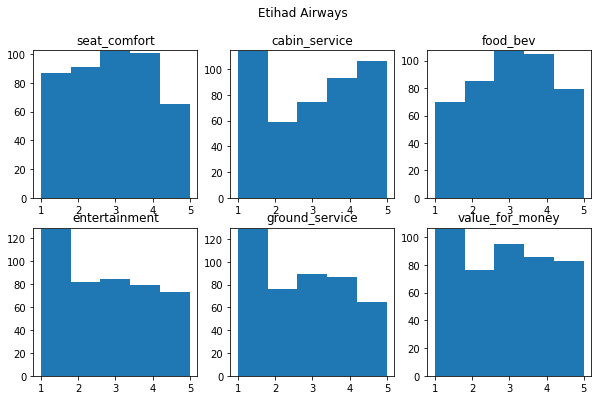

5


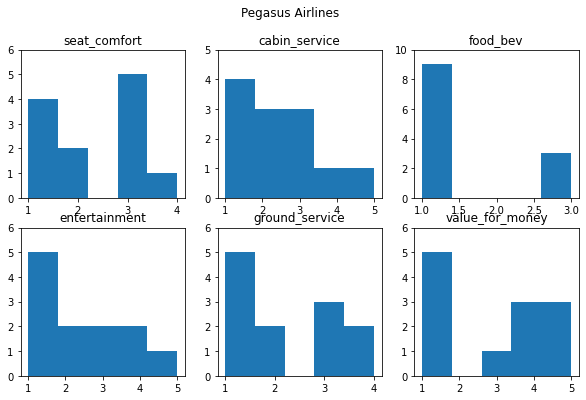

5


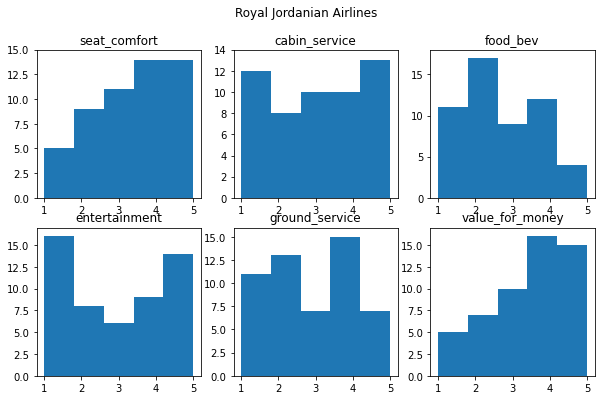

5


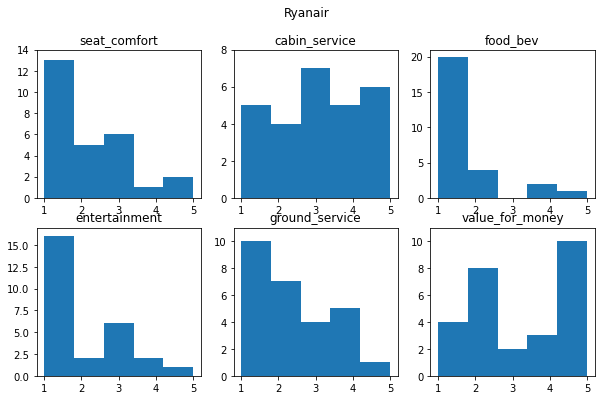

5


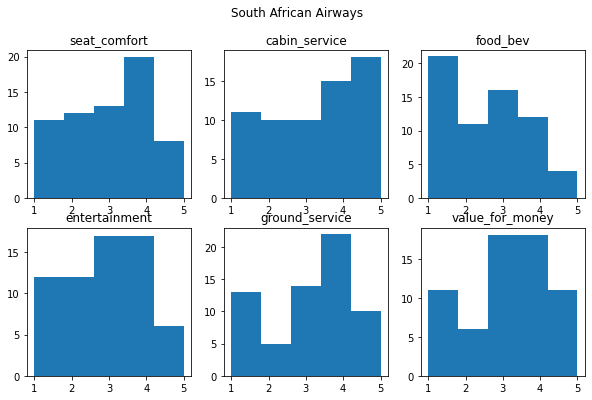

5


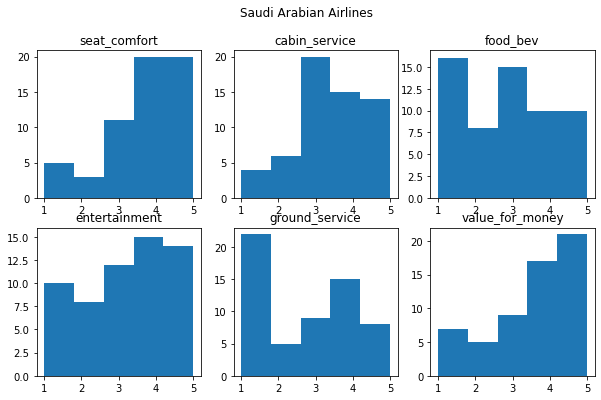

5


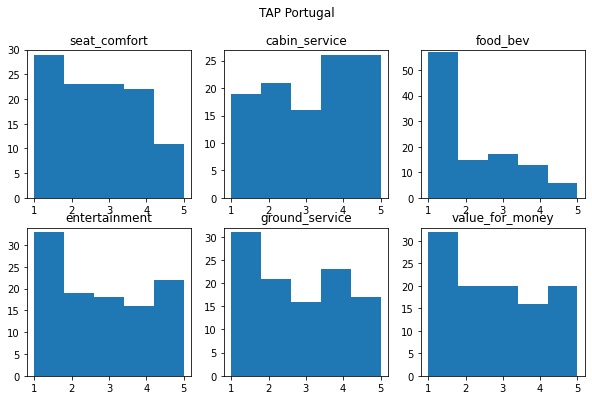

5


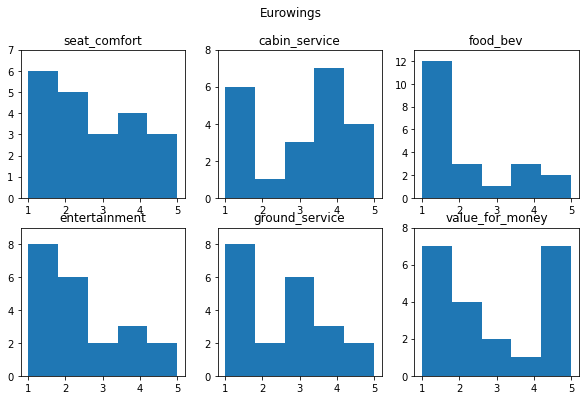

5


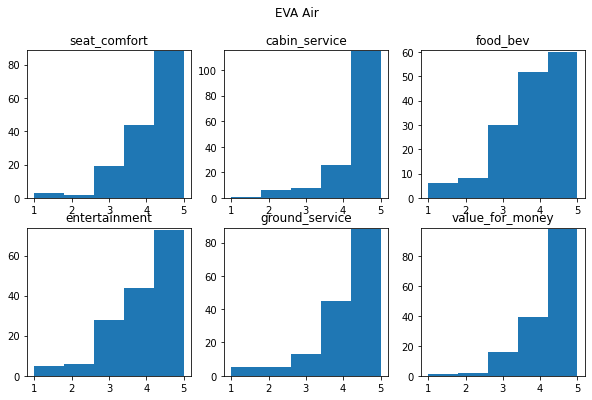

5


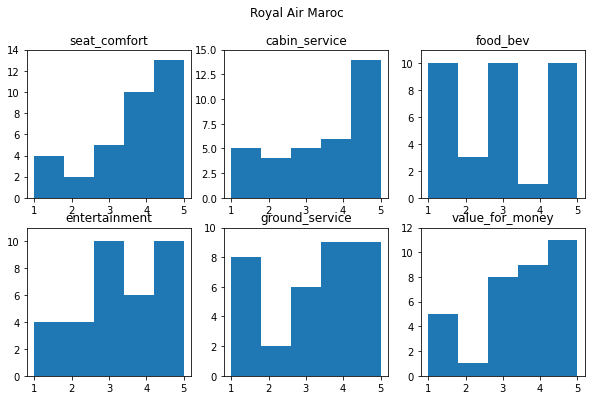

5


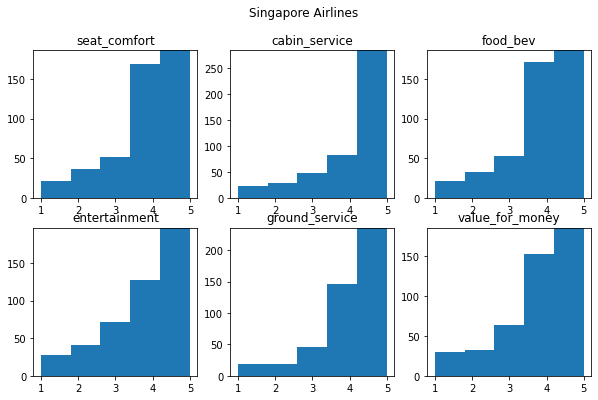

5


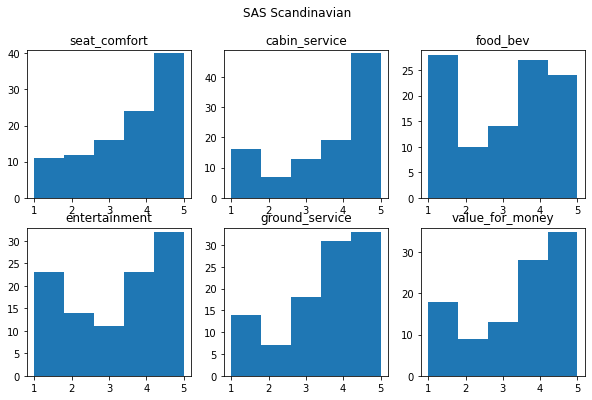

5


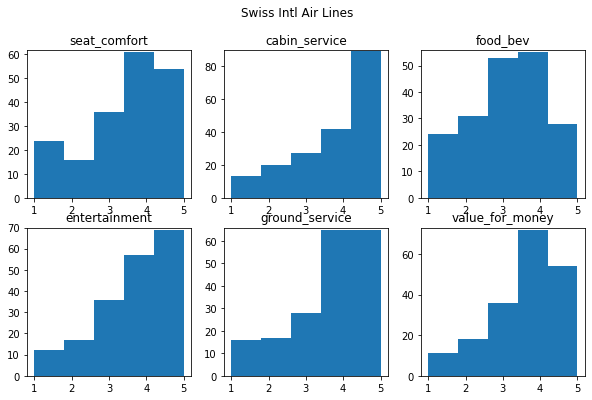

5


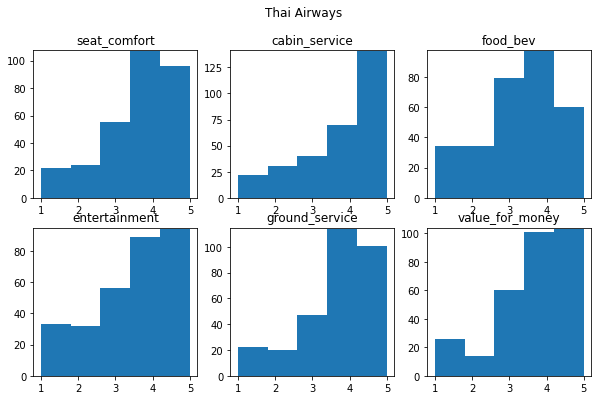

5


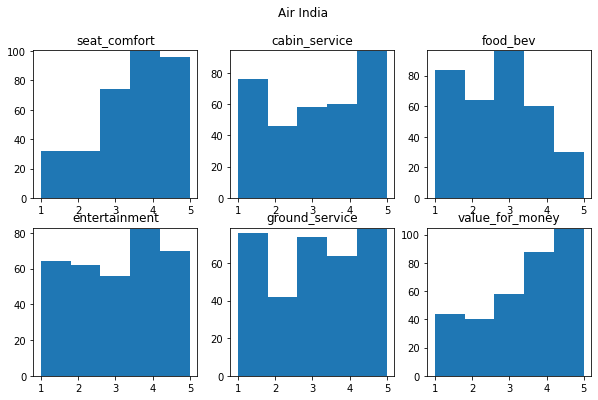

5


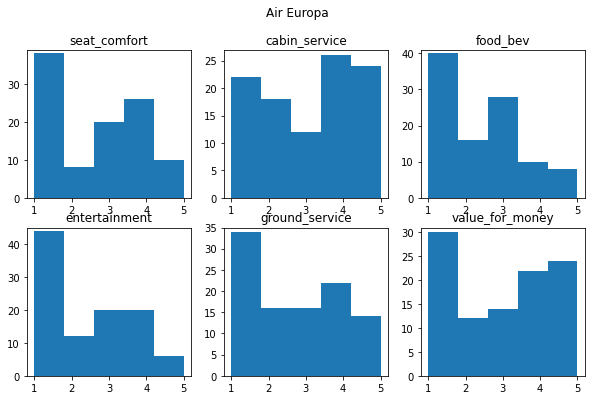

5


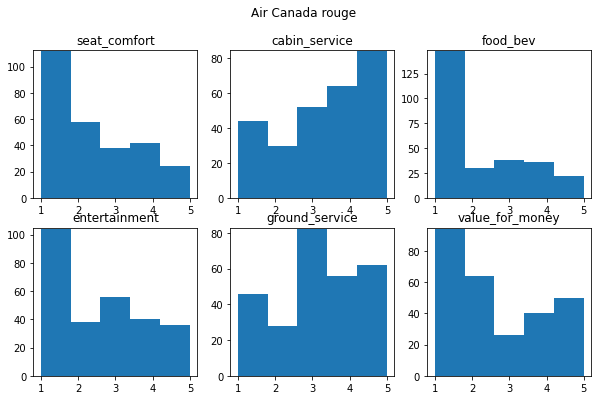

5


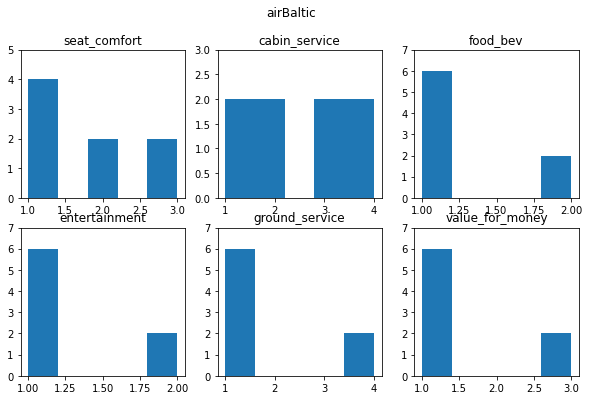

5


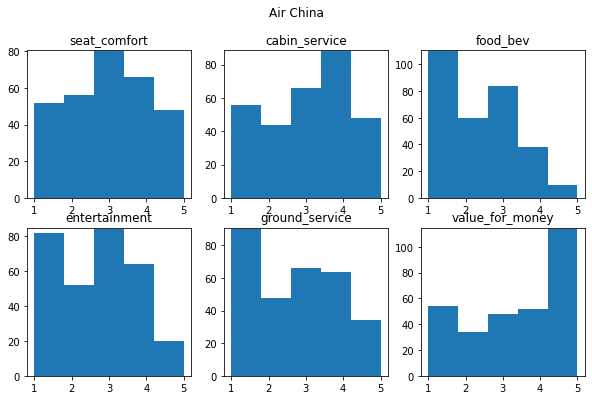

5


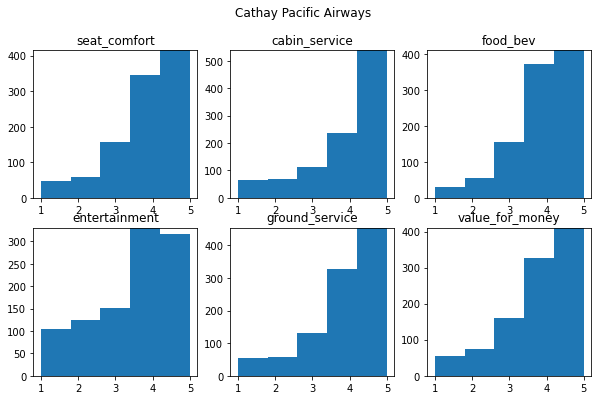

5


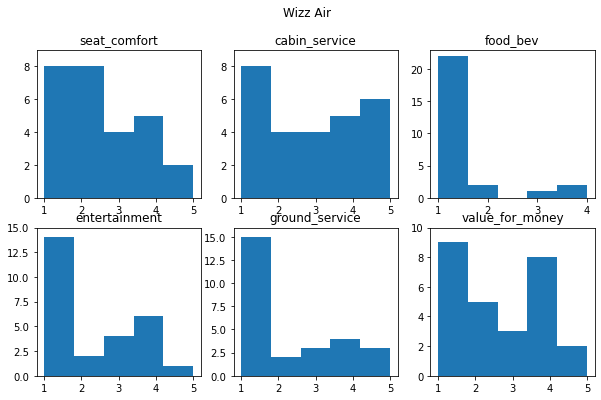

5


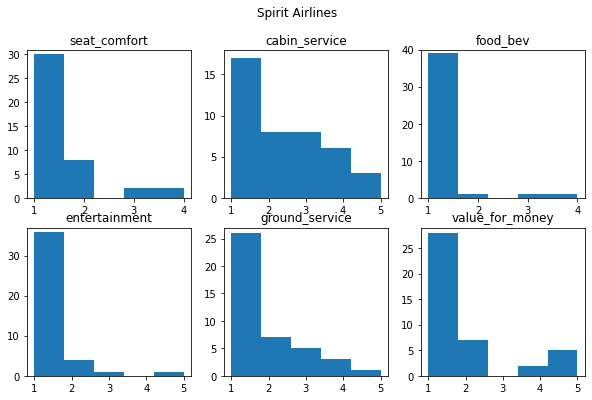

5


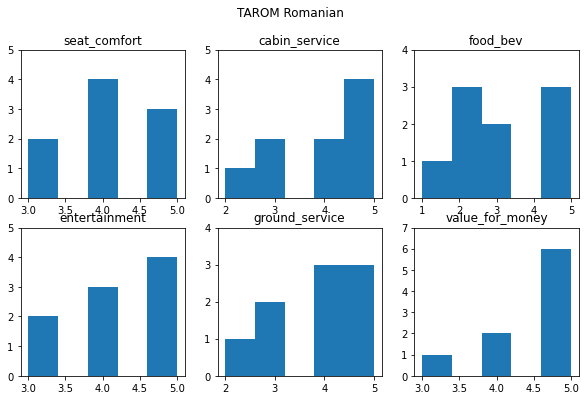

5


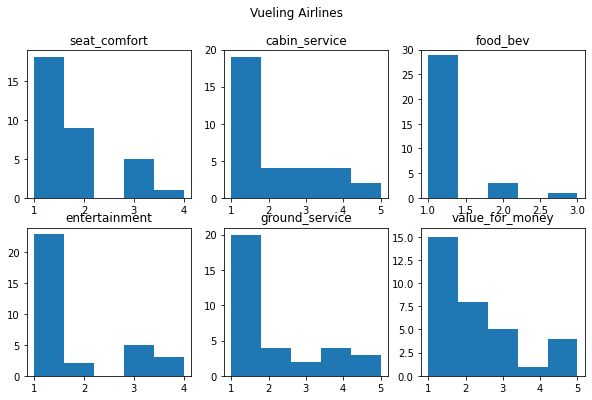

5


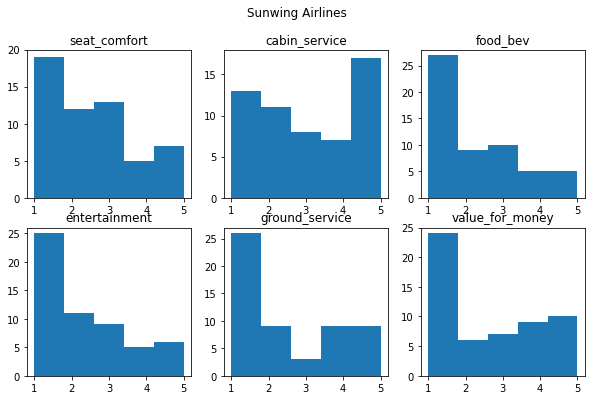

5


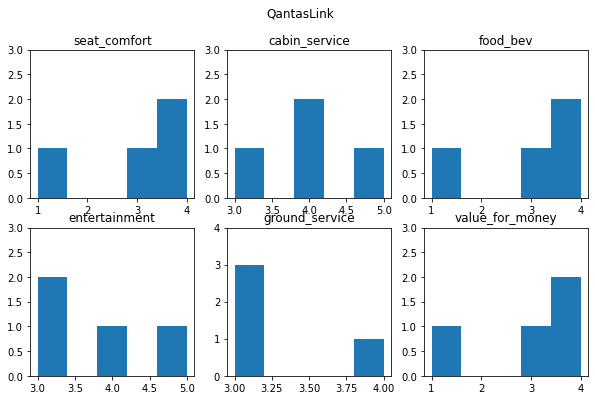

5


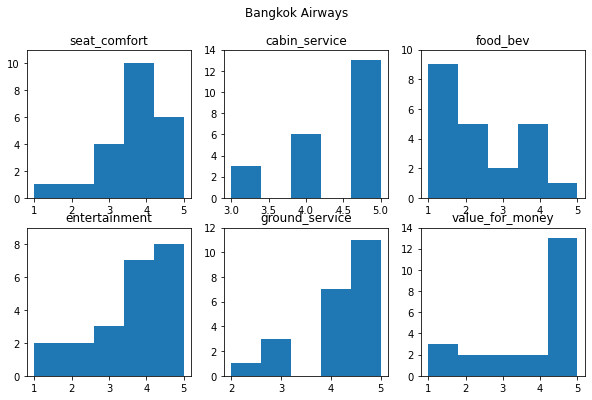

5


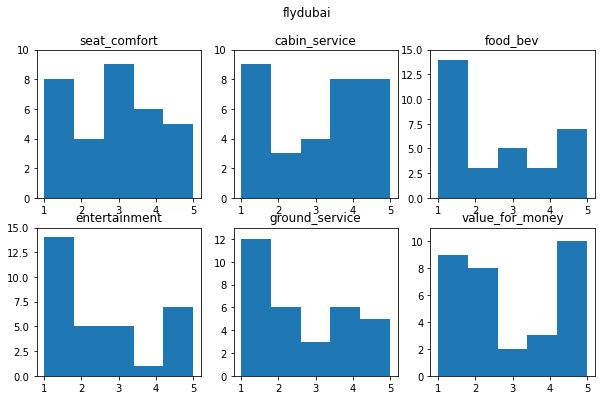

5


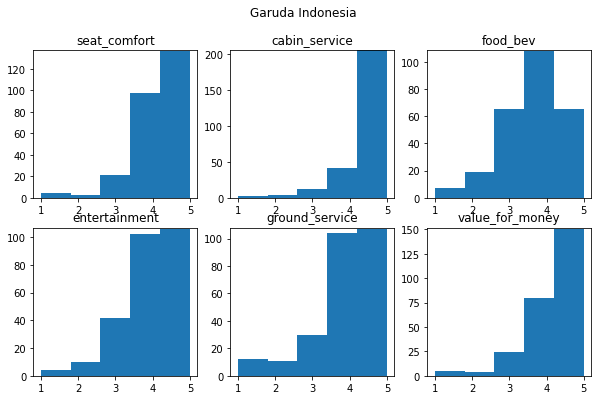

5


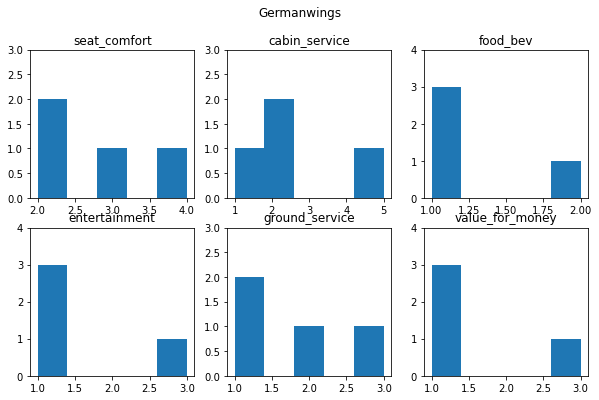

5


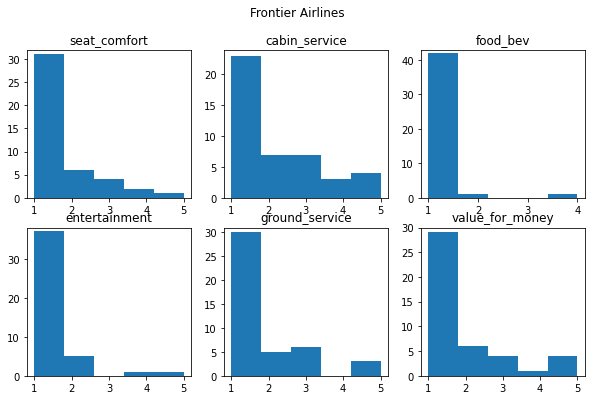

5


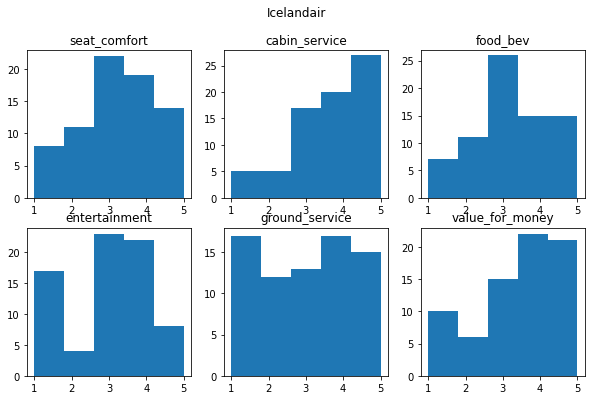

5


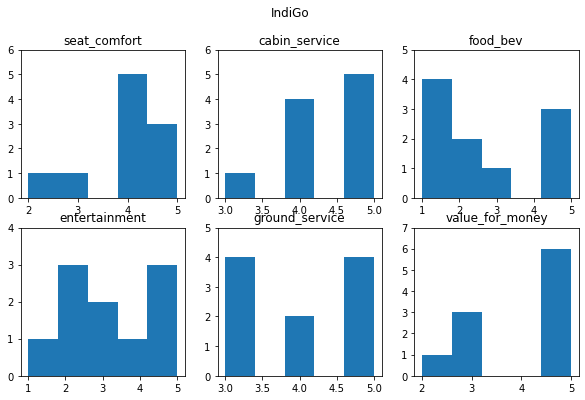

5


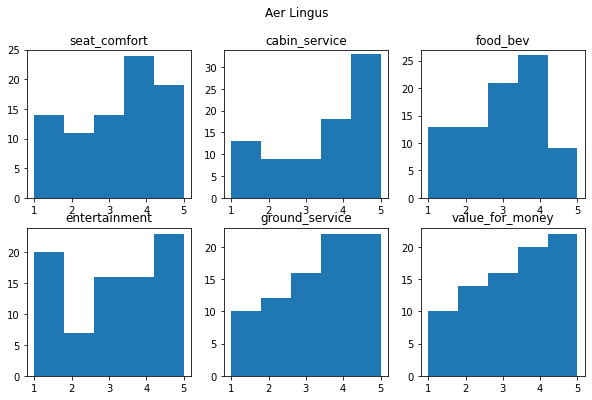

5


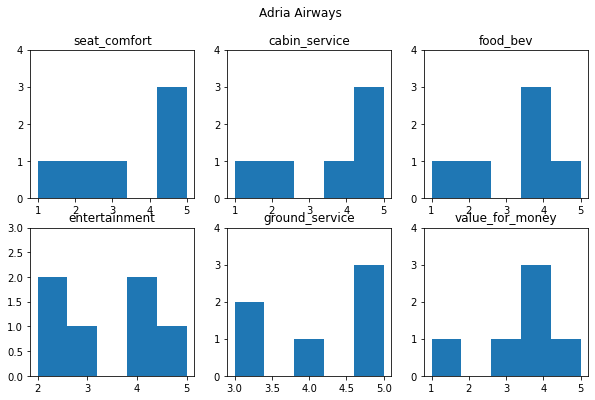

5


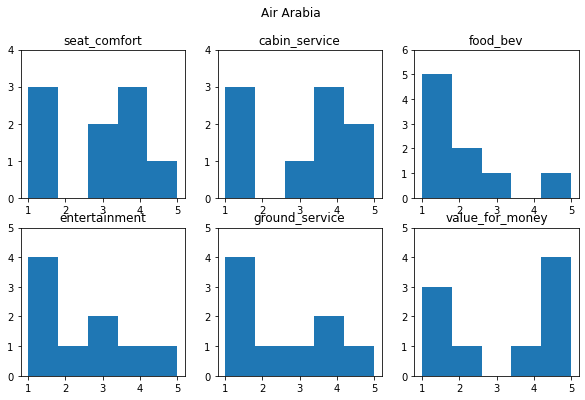

5


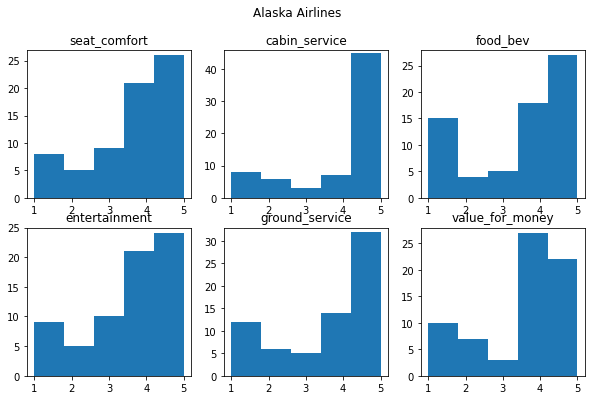

5


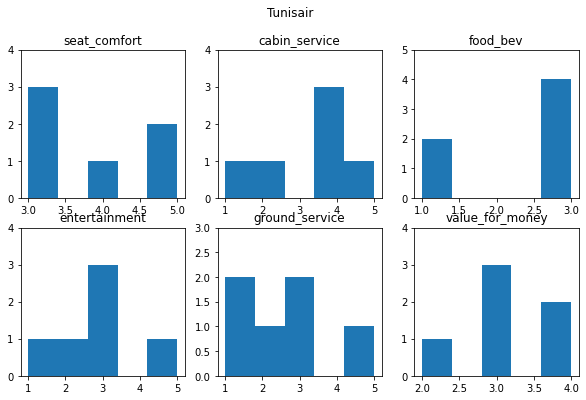

5


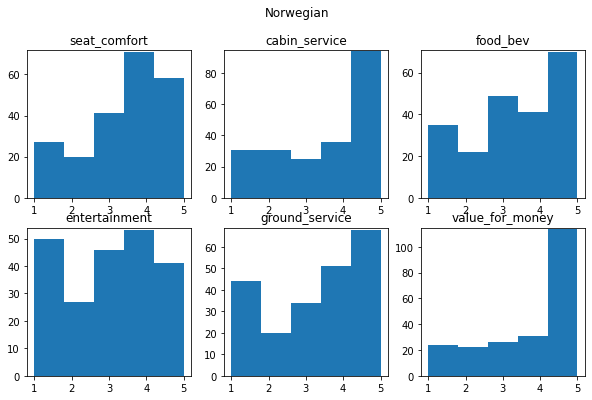

5


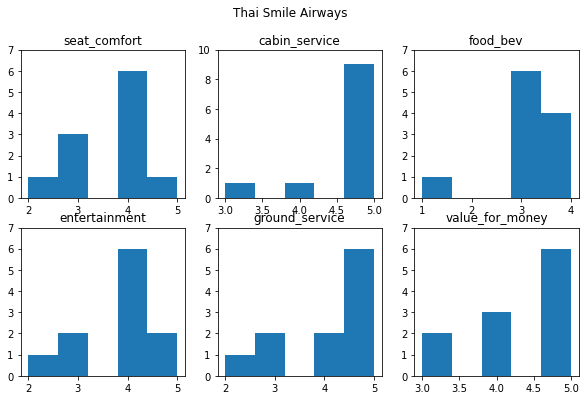

5


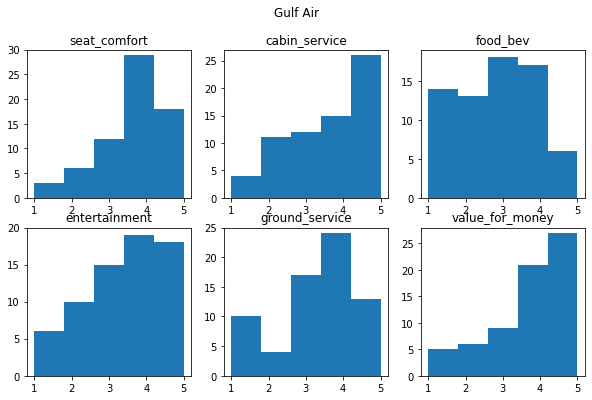

5


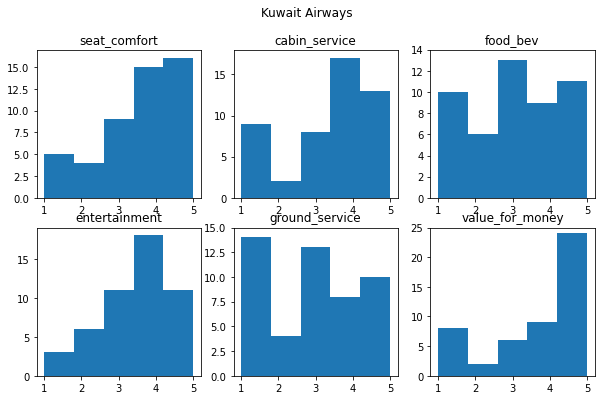

5


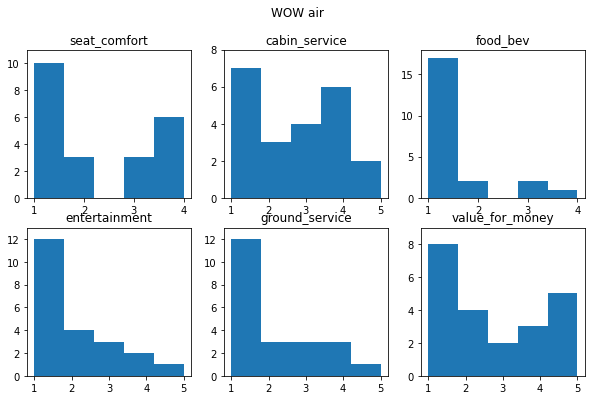

5


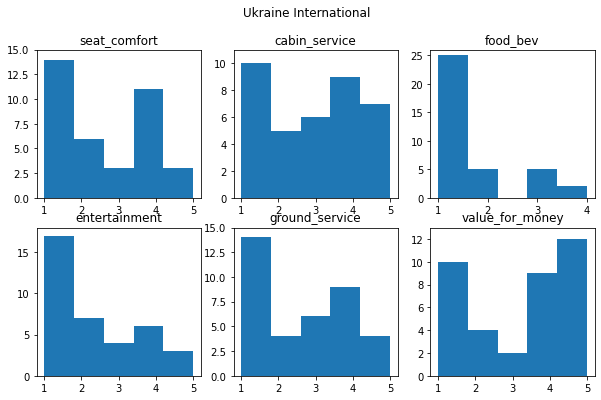

5


In [5]:
for j in list(df_flight['airline'].unique()):
    df = df_flight[df_flight['airline'] == j]
    seat_comfort = list(df['seat_comfort'])
    cabin_service = list(df['cabin_service'])
    entertainment = list(df['entertainment'])
    food_bev = list(df['food_bev'])
    ground_service = list(df['ground_service'])
    value_for_money = list(df['value_for_money'])

    # Create a grid of subplots
    fig, axs = plt.subplots(2, 3, figsize=(10, 6))
    axs = axs.ravel()
    # Plot each feature's histogram on a separate subplot
    for i, feature in enumerate([seat_comfort, cabin_service, entertainment, food_bev, ground_service, value_for_money]):
        freq, bins, patches = axs[i].hist(feature, bins=5)
        axs[i].set_title(cols[i])
        axs[i].set_ylim([0, np.max(freq) + 1]) 
    fig.suptitle(str(j))
    
    # Display the figure
    plt.show()
    print(i)

The histogram shows the distribution of each quantitative data for each airline. For a specific airline, the distribution of each quantitative feature has nearly the same shape either right skew, left skew or bimodal. For example, Qatar Aiways has highly negative skewed distribution, espically for cabin service. Sotherwest Airlines has bimodal distribution. Score for each services is wither extreme positive(5) or exterme negative(1). Overall, most of the distribution are bimodal, and hardly has any normal distribution. 

Text(0.5, 0.98, 'Boxplot of Overall Ratings by Recommendation Status')

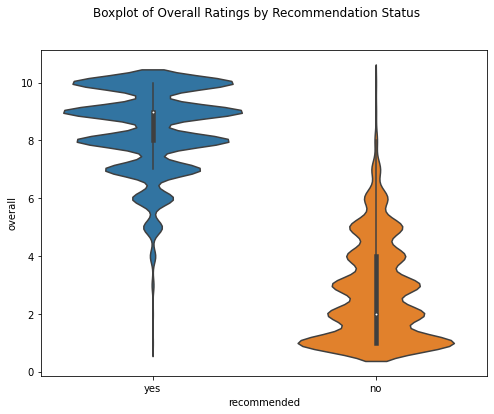

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))
#df_flight.groupby('recommended').boxplot(column='overall', ax=ax)
violinplot = sns.violinplot(x='recommended', y='overall', data=df_flight, ax=ax)
plt.suptitle('Boxplot of Overall Ratings by Recommendation Status')

The violin plot visually represents the distribution of overall scores (ranging from 0 to 10) for airline journeys, with the scores on the y-axis and recommendations on the x-axis, divided into two categories: "yes" and "no." From the plot, it is evident that passengers who recommend their airline journey to friends generally have overall scores between 8 and 10. Interestingly, a score of 9 exhibits the highest probability of recommendation, even surpassing a perfect score of 10. Furthermore, passengers with scores between 4 and 6 also show a likelihood of recommending their airline journey, whereas those with scores below 4 tend not to recommend the experience.

On the other hand, the "no" column demonstrates that passengers who do not recommend their airline journey to friends typically have scores ranging from 0 to 3. However, there is still a probability of not recommending the journey for passengers with scores between 4 and 7. Remarkably, above a score of 7, passengers are more inclined to recommend their journey. The overall trend in the "no" column exhibits a decreasing pattern as scores increase from 0 to 10, indicating that the likelihood of not recommending the journey diminishes as the overall scores improve.

## Model

## 1. Decision Tree

In [7]:
# convert categorical variables to dummy variables
dummy = pd.get_dummies(df_flight['airline'])
dummy_travel = pd.get_dummies(df_flight['traveller_type'])
dummy_cabin = pd.get_dummies(df_flight['cabin'])
df_flight = pd.concat([df_flight, dummy,dummy_travel,dummy_cabin], axis=1)

In [8]:
X = df_flight.drop(['author', 'review_date','route','recommended','aircraft','airline','customer_review','date_flown','traveller_type',
            'cabin','overall'], axis = 1)
y = df_flight['recommended']

In [9]:
from sklearn.model_selection import train_test_split
# split train test data
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [10]:
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
# Simple Tree Model
from sklearn.metrics import accuracy_score, confusion_matrix 
y_predict = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
matrix = confusion_matrix(y_test, y_predict)
print('Accuracy for simple decision tree: ', accuracy)
print('Confusion Matrix for simple decision tree: \n',matrix)

Accuracy for simple decision tree:  0.9025677101653183
Confusion Matrix for simple decision tree: 
 [[ 789  133]
 [ 144 1777]]


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
# find best max_depth
max_depth_range = range(2, 50+1)
cv_scores = []
for depth in max_depth_range:
    model_tree = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model_tree, X_train, y_train, cv=5)
    cv_scores.append(-1 * scores.mean())

# Find the optimal value of max_depth
optimal_depth = max_depth_range[cv_scores.index(min(cv_scores))]

# Print the optimal value of max_depth
print('Optimal max_depth:', optimal_depth)
model_tree_depth = DecisionTreeClassifier(max_depth=optimal_depth)
model_tree_depth.fit(X_train, y_train)
predictions_depth = model_tree_depth.predict(X_test)
accuracy_depth = accuracy_score(y_test, predictions_depth)
print('The accuracy of decision tree classifier with optimal depth is: ', 
      accuracy_depth)

Optimal max_depth: 7
The accuracy of decision tree classifier with optimal depth is:  0.911712979247274


In [13]:
#find best min_samples_split_range
min_samples_split_range = range(2, 100+1)
cv_scores_split = []
for split in min_samples_split_range:
    model_tree = DecisionTreeClassifier(min_samples_split=split)
    scores = cross_val_score(model_tree, X_train, y_train, cv=5)
    cv_scores_split.append(-1 * scores.mean())

optimal_split = min_samples_split_range[cv_scores_split.index(min(cv_scores_split))]

print('Optimal min_samples_split:', optimal_split)
model_tree_split = DecisionTreeClassifier(min_samples_split=optimal_split)
model_tree_split.fit(X_train, y_train)
predictions_tree_split = model_tree_split.predict(X_test)
accuracy_split = accuracy_score(y_test, predictions_tree_split)
print('The accuracy of decision tree classifier with optimal min_samples_split is: ', 
      accuracy_split)

Optimal min_samples_split: 100
The accuracy of decision tree classifier with optimal min_samples_split is:  0.9106577558916638


In [14]:
#find best min_samples_leaf_range
leaf = tree.get_n_leaves()
min_samples_leaf_range = range(1, leaf+1)
cv_scores_leaf = []
for leaf in min_samples_leaf_range:
    model_tree = DecisionTreeClassifier(min_samples_leaf=leaf)
    scores = cross_val_score(model_tree, X_train, y_train, cv=5)
    cv_scores_leaf.append(-1 * scores.mean())

optimal_leaf = min_samples_leaf_range[cv_scores_leaf.index(min(cv_scores_leaf))]

print('Optimal min_samples_leaf:', optimal_leaf)
model_tree_leaf = DecisionTreeClassifier(min_samples_leaf=optimal_leaf)
model_tree_leaf.fit(X_train, y_train)
predictions_tree_leaf = model_tree_leaf.predict(X_test)
accuracy_leaf = accuracy_score(y_test, predictions_tree_leaf)
print('The accuracy of decision tree classifier with optimal min_samples_leaf is: ', 
      accuracy_leaf)

Optimal min_samples_leaf: 59
The accuracy of decision tree classifier with optimal min_samples_leaf is:  0.9148786493141048


The training accuracy of decision tree classifier is:  0.9346468466883631
The testing accuracy of decision tree classifier is:  0.9148786493141048
Confusion Matrix for optimal decision tree: 
 [[ 826   96]
 [ 146 1775]]


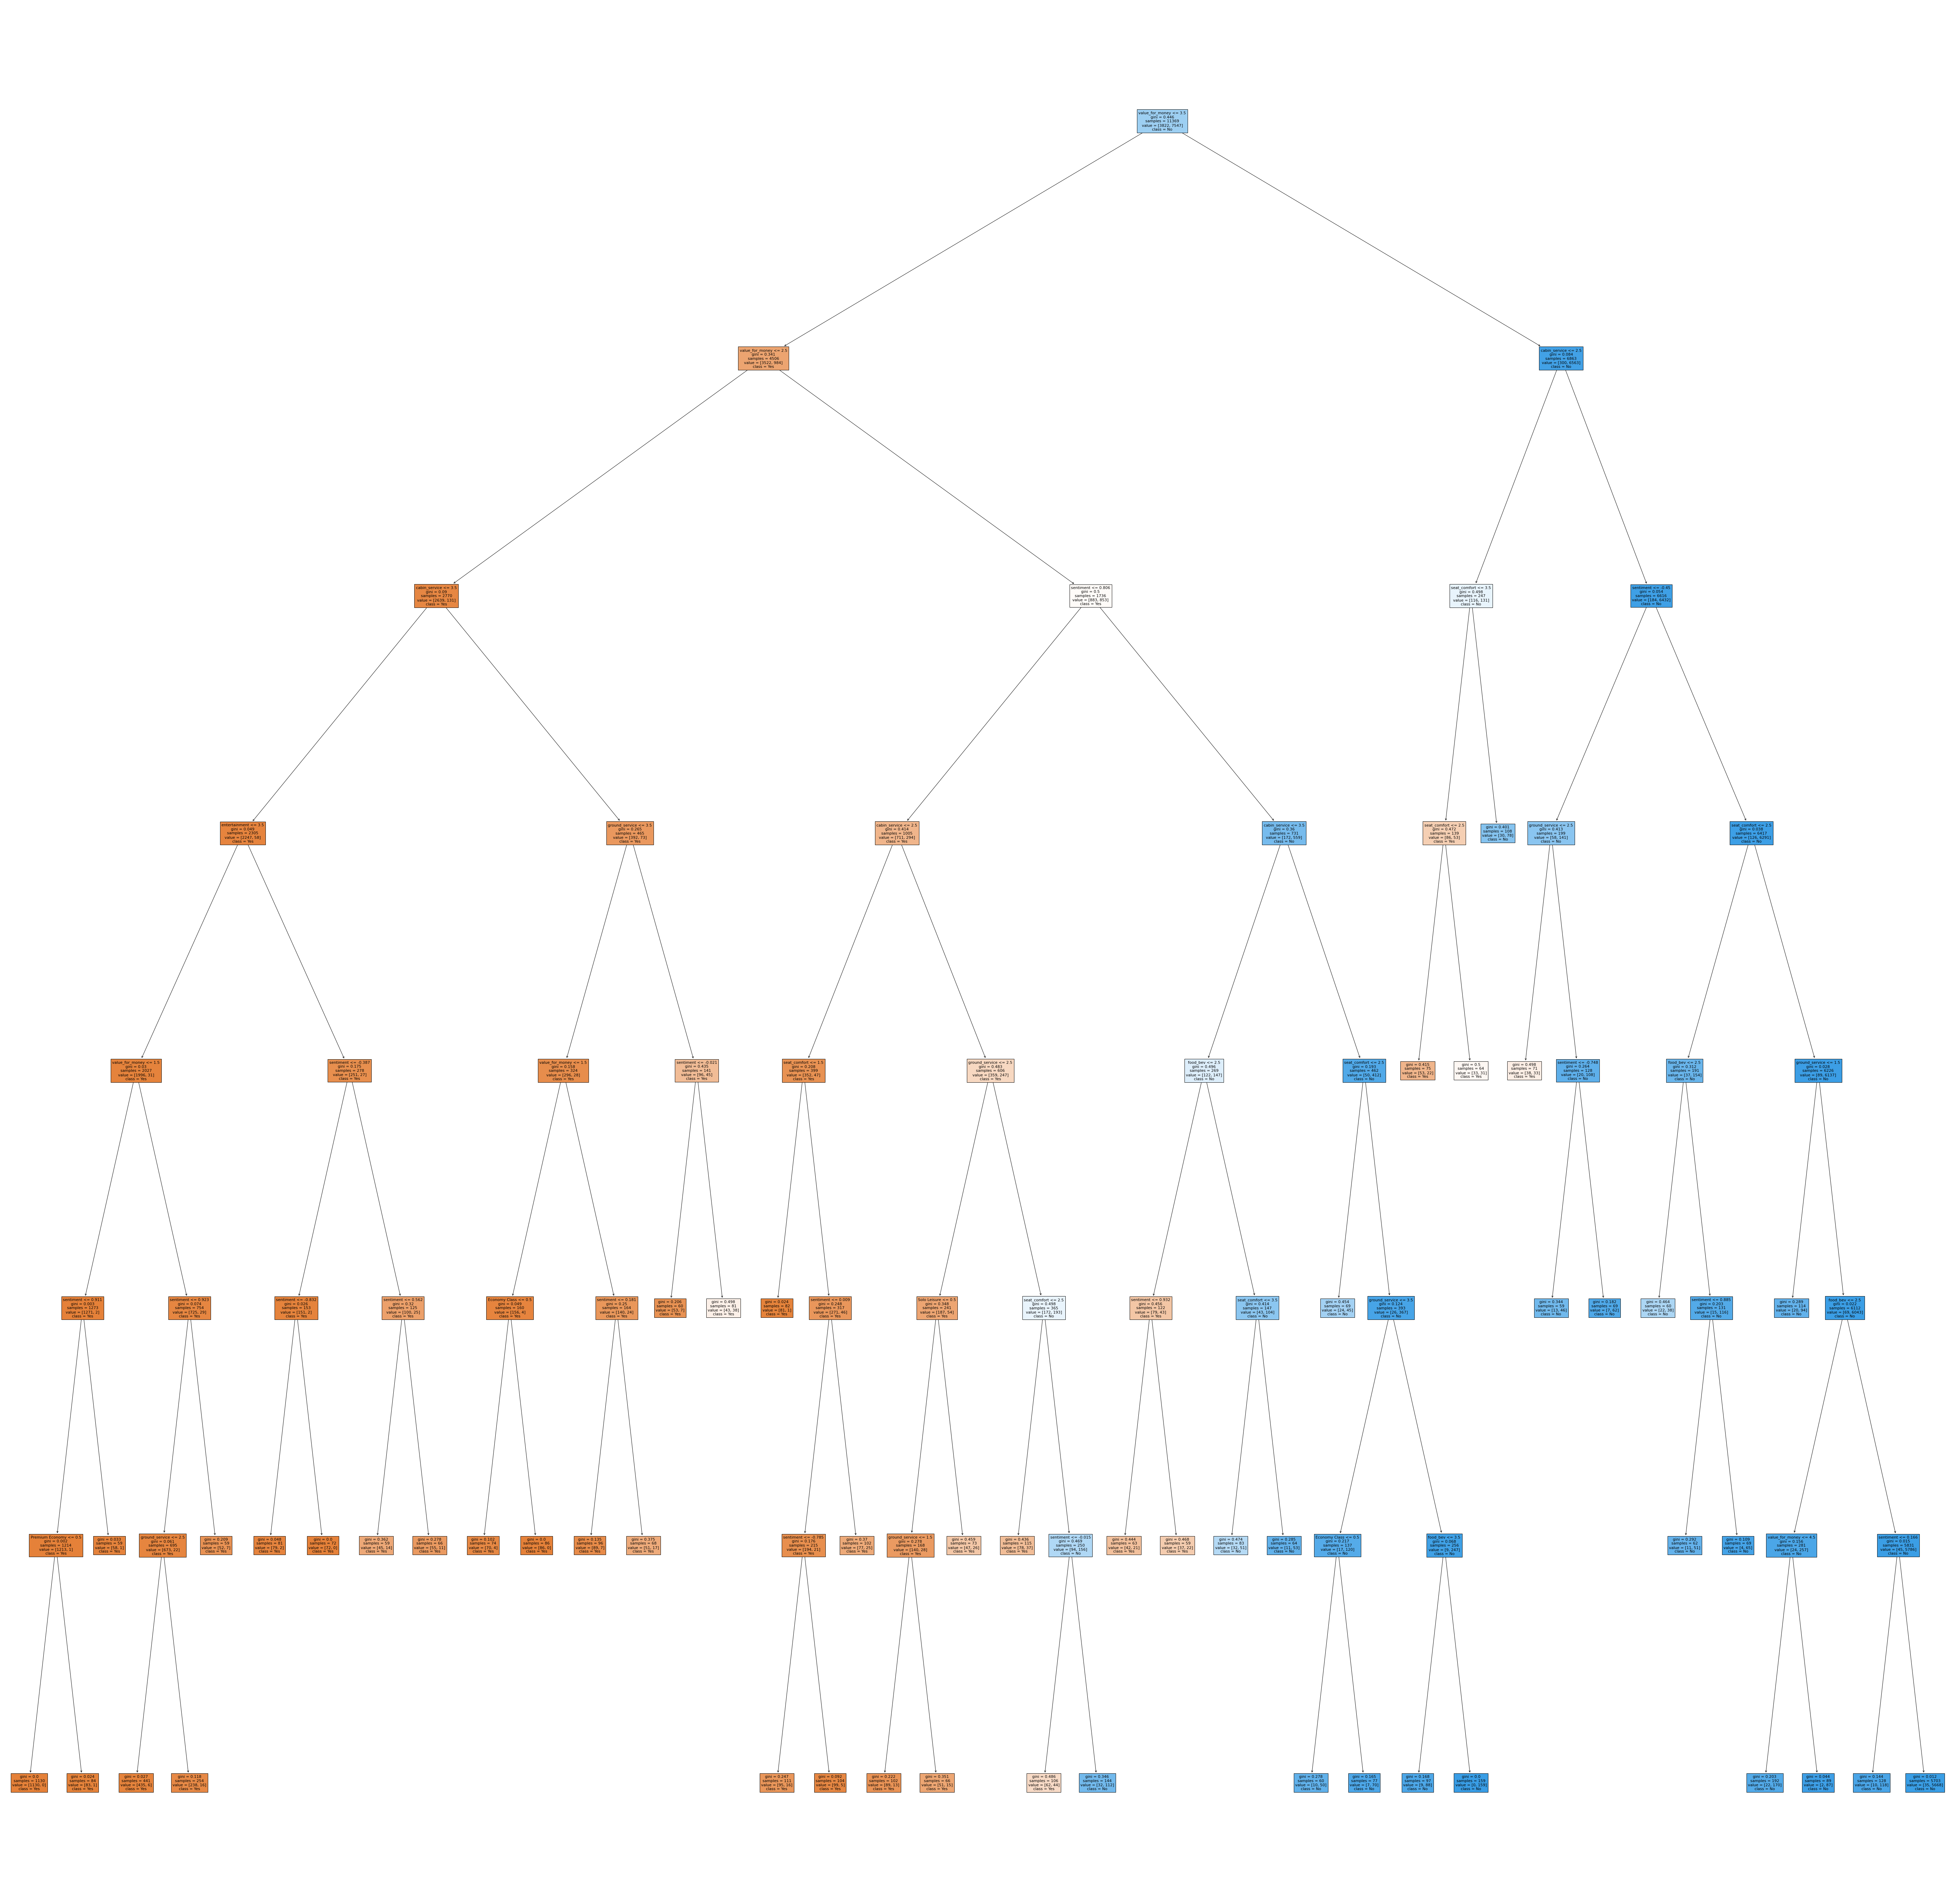

In [15]:
from sklearn.tree import plot_tree

# Build the tree using optimal parameters
tree_optimal = DecisionTreeClassifier(max_depth=optimal_depth,
                                     min_samples_split=optimal_split, 
                                     min_samples_leaf=optimal_leaf)

tree_optimal.fit(X_train, y_train)

predictions_optimal_train = tree_optimal.predict(X_train)
accuracy_optimal_train = accuracy_score(y_train, predictions_optimal_train)
print('The training accuracy of decision tree classifier is: ', accuracy_optimal_train)

predictions_optimal = tree_optimal.predict(X_test)
accuracy_optimal = accuracy_score(y_test, predictions_optimal)
print('The testing accuracy of decision tree classifier is: ', accuracy_optimal)
matrix = confusion_matrix(y_test, predictions_optimal)
print('Confusion Matrix for optimal decision tree: \n',matrix)

fig, ax = plt.subplots(figsize=(100, 100))
plot_tree(tree_optimal, feature_names = list(X_train.columns),
          class_names=['Yes', 'No'],  filled = True, ax= ax)
plt.show()

The training and testing accuracy of the optimal decision tree model is 0.93 and 0.91. It shows that the model is well-fitted for prediction also no obvious overfitting problem exists.. 

### Use the bagging approach

In [16]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(base_estimator=tree_optimal) 
bagging.fit(X_train, y_train)
bagging_prediction = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_prediction)
print("Bagging accuracy : ", bagging_accuracy)
matrix = confusion_matrix(y_test, bagging_prediction)
print('Confusion Matrix for Bagging approach: \n',matrix)

Bagging accuracy :  0.9148786493141048
Confusion Matrix for Bagging approach: 
 [[ 810  112]
 [ 130 1791]]


In [17]:
# Get ten moset important variables
tree_feature_importance=tree_optimal.feature_importances_
tree_importance = pd.DataFrame({'feature' : list(X_train.columns),
                                'importance' : tree_feature_importance})
tree_importance.sort_values(by='importance',ascending=False).head(10)

,feature,importance
5,value_for_money,0.850299
6,sentiment,0.064648
1,cabin_service,0.047026
4,ground_service,0.014994
0,seat_comfort,0.014529
2,food_bev,0.006604
91,Solo Leisure,0.000917
3,entertainment,0.000822
93,Economy Class,0.000155
95,Premium Economy,0.000006


Using single decision tree, Value_for_Money is the most important variable, which takes 85% responsibility in determing whether the filght will be recommended.

## 2. Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
# Train the basic random forest
random_forest = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
random_forest.fit(X_train, y_train)
random_forest_prediction = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_prediction)
print("Accuracy of Random Forest Regressor model:", random_forest_accuracy)

Accuracy of Random Forest Regressor model: 0.9296517762926486


In [19]:
#find best num_variables_range
variables = len(list(X_train.columns))
num_variables_range = range(1, 21)
cv_scores_variables = []
for varaible in num_variables_range:
    model_forest = RandomForestClassifier(max_features=varaible)
    scores = cross_val_score(model_forest, X_train, y_train, cv=5)
    cv_scores_variables.append(-1 * scores.mean())

optimal_variables = num_variables_range[cv_scores_variables.index(min(cv_scores_variables))]

print('Optimal max_features:', optimal_variables)
model_forest_variables = RandomForestClassifier(max_features=optimal_variables)
model_forest_variables.fit(X_train, y_train)
predictions_forest_variables = model_forest_variables.predict(X_test)
accuracy_variables = accuracy_score(y_test, predictions_forest_variables)
print('The accuracy of Random Forest classifier with optimal max_features is: ', 
      accuracy_variables)

Optimal max_features: 6
The accuracy of Random Forest classifier with optimal max_features is:  0.9307069996482589


In [20]:
#find best num_variables_range
num_n_estimators_range = range(1, 21)
cv_scores_n_estimators = []
for estimator in num_variables_range:
    model_forest = RandomForestClassifier(n_estimators=estimator)
    scores = cross_val_score(model_forest, X_train, y_train, cv=5)
    cv_scores_n_estimators.append(-1 * scores.mean())

optimal_estimators = num_n_estimators_range[cv_scores_n_estimators.index(min(cv_scores_n_estimators))]

print('Optimal n_estimators:', optimal_estimators)
model_forest_estimators = RandomForestClassifier(n_estimators=optimal_estimators)
model_forest_estimators.fit(X_train, y_train)
predictions_forest_estimators = model_forest_estimators.predict(X_test)
accuracy_estimators = accuracy_score(y_test, predictions_forest_estimators)
print('The accuracy of Random Forest Classifier with optimal num_n_estimators is: ', 
      accuracy_estimators)

Optimal n_estimators: 20
The accuracy of Random Forest Classifier with optimal num_n_estimators is:  0.9296517762926486


In [21]:
# Random forest with optimald parameters
forest_optimal = RandomForestClassifier(n_estimators=optimal_estimators,
                                     max_features=optimal_variables)
forest_optimal.fit(X_train, y_train)

predictions_optimal_forest_train = forest_optimal.predict(X_train)
accuracy_optimal_forest_train = accuracy_score(y_train, predictions_optimal_forest_train)
print('The training accuracy of Random Forest Classifier is: ', accuracy_optimal_forest_train)

predictions_optimal_forest = forest_optimal.predict(X_test)
accuracy_optimal_forest = accuracy_score(y_test, predictions_optimal_forest)
print('The testing accuracy of Random Forest Classifier is: ', accuracy_optimal_forest)

The training accuracy of Random Forest Classifier is:  0.998944498196851
The testing accuracy of Random Forest Classifier is:  0.9278930706999649


In [22]:
# find features importance
random_forest_feature_importance=forest_optimal.feature_importances_
random_forest_importance = pd.DataFrame({'feature' : list(X_train),
                                'importance' : random_forest_feature_importance})
random_forest_importance.sort_values(by='importance',ascending=False).head(10)

,feature,importance
5,value_for_money,0.171446
6,sentiment,0.142361
0,seat_comfort,0.139560
2,food_bev,0.129251
1,cabin_service,0.129023
3,entertainment,0.080504
4,ground_service,0.075392
91,Solo Leisure,0.007216
93,Economy Class,0.005965
89,Couple Leisure,0.005934


Random forest model has a higher accuarcy for testing dataset. Different than single decision tree, random forest model doesn't have a single feature takes high percentage of the importance but have multiple features take the importance together which could cover more variance. By using multiple trees, the model can capture a wider range of patterns and relationships within the data, leading to improved performance and generalization.

## 3. KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

# Specify the hyperparameters and their possible values
params = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Use GridSearchCV with cross-validation to find the best parameters
grid = GridSearchCV(knn, params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model on the training data
grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid.best_params_
print("Best parameters:", best_params)


Best parameters: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}


In [24]:
# Train the KNN classifier using the best parameters
from sklearn.metrics import classification_report
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

y_pred = knn_best.predict(X_test)
y_pred_train = knn_best.predict(X_train)

# Evaluate the model's performance
accuracy_training = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", accuracy_training)
accuracy_testing = accuracy_score(y_test, y_pred)
print("Testing Accuracy:", accuracy_testing)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Training Accuracy: 1.0
Testing Accuracy: 0.9261343651072811
Confusion Matrix:
 [[ 812  110]
 [ 100 1821]]
Classification Report:
               precision    recall  f1-score   support

          no       0.89      0.88      0.89       922
         yes       0.94      0.95      0.95      1921

    accuracy                           0.93      2843
   macro avg       0.92      0.91      0.92      2843
weighted avg       0.93      0.93      0.93      2843



KNN model has a extremely high accuracy for taining data(1), and high accuracy for testign accuracy. The model is good for prediction. However, oeverfitting would results in poor generalization and high complexity.